## Human action recognition ##
By Mark Putter - s3945532

In [2]:
import tensorflow as tf

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# load data
data=pd.read_csv("./A1_2024_data/train_data_2024.csv")

print(data.columns)

Index(['FileName', 'Class', 'MoreThanOnePerson', 'HighLevelCategory'], dtype='object')


In [80]:
# Inspect data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FileName           4500 non-null   object
 1   Class              4500 non-null   object
 2   MoreThanOnePerson  4500 non-null   object
 3   HighLevelCategory  4500 non-null   object
dtypes: object(4)
memory usage: 140.8+ KB


,FileName,Class,MoreThanOnePerson,HighLevelCategory
count,4500,4500,4500,4500
unique,4500,40,2,10
top,Img_460.jpg,applauding,NO,Social_LeisureActivities
freq,1,222,2830,866


We can see that there are no missing values in the data set. The columns in the data set are as follows: `FileName`, `Class`, `MoreThanOnePerson` and `HighLevelCategory`. We will now check how the data is distributed between the classes in the 'Class' column.

{'applauding': 222, 'holding_an_umbrella': 157, 'climbing': 155, 'riding_a_horse': 153, 'cooking': 153, 'playing_guitar': 152, 'walking_the_dog': 151, 'riding_a_bike': 144, 'jumping': 144, 'feeding_a_horse': 138, 'fishing': 136, 'blowing_bubbles': 132, 'drinking': 131, 'playing_violin': 130, 'phoning': 129, 'running': 124, 'fixing_a_car': 124, 'reading': 117, 'smoking': 115, 'writing_on_a_book': 113, 'pushing_a_cart': 111, 'using_a_computer': 107, 'fixing_a_bike': 107, 'cleaning_the_floor': 92, 'watching_TV': 91, 'shooting_an_arrow': 89, 'waving_hands': 88, 'pouring_liquid': 87, 'throwing_frisby': 86, 'looking_through_a_telescope': 85, 'gardening': 82, 'cutting_trees': 78, 'looking_through_a_microscope': 77, 'taking_photos': 77, 'cutting_vegetables': 75, 'brushing_teeth': 73, 'rowing_a_boat': 72, 'writing_on_a_board': 69, 'texting_message': 67, 'washing_dishes': 67}
Mean number of data points: 112.5


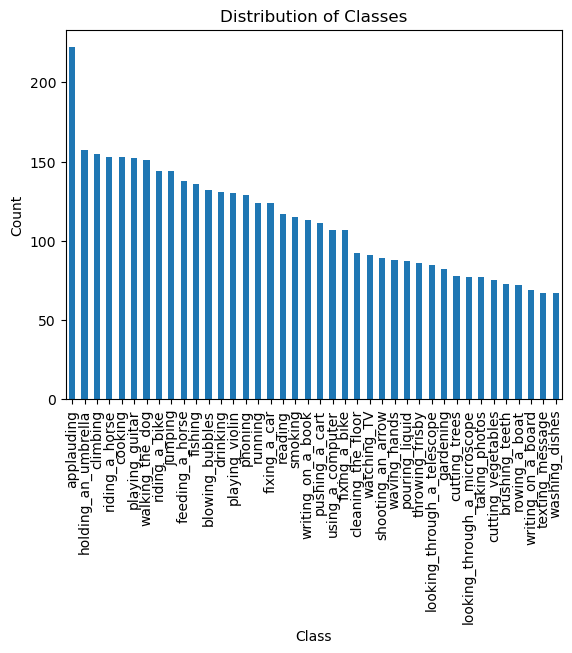

In [3]:
class_counts = data['Class'].value_counts().to_dict()
print(class_counts)

print("Mean number of data points:", sum(class_counts.values()) / len(class_counts) )

data['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The above graph shows that there is class imbalance in the data set which can cause the model to bias to the more common classes and can also lead to missleading accuracy metrics as guessing the more common classes will lead to higher accuracy rate. 

I will make use of undersampling the data to match the count of 67 for `washing_dishes`. If the resulting performance from the model is poor then I will attempt to oversample the data using SMOTE.

In [4]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

label_column = 'Class'
desired_sample_count = 67

# Create the sampling strategy
sampler = {label: desired_sample_count for label in data[label_column].unique()}

# Apply undersampling to the data
under_sampler = RandomUnderSampler(sampling_strategy=sampler, random_state=42)
data_resampled, _ = under_sampler.fit_resample(data, data[label_column])

class_counts = data_resampled[label_column].value_counts().to_dict()
print(class_counts)

{'applauding': 67, 'blowing_bubbles': 67, 'pushing_a_cart': 67, 'reading': 67, 'riding_a_bike': 67, 'riding_a_horse': 67, 'rowing_a_boat': 67, 'running': 67, 'shooting_an_arrow': 67, 'smoking': 67, 'taking_photos': 67, 'texting_message': 67, 'throwing_frisby': 67, 'using_a_computer': 67, 'walking_the_dog': 67, 'washing_dishes': 67, 'watching_TV': 67, 'waving_hands': 67, 'writing_on_a_board': 67, 'pouring_liquid': 67, 'playing_violin': 67, 'playing_guitar': 67, 'feeding_a_horse': 67, 'brushing_teeth': 67, 'cleaning_the_floor': 67, 'climbing': 67, 'cooking': 67, 'cutting_trees': 67, 'cutting_vegetables': 67, 'drinking': 67, 'fishing': 67, 'phoning': 67, 'fixing_a_bike': 67, 'fixing_a_car': 67, 'gardening': 67, 'holding_an_umbrella': 67, 'jumping': 67, 'looking_through_a_microscope': 67, 'looking_through_a_telescope': 67, 'writing_on_a_book': 67}


We will now take a look at the distribution for the other field we care about predicting which is `MoreThanOnePerson`. Ideally this should be evenly distibuted among the whole data set but it should also be evenly distributed among each class or it may be easy to make a prediction based solely on what `Class` it thinks it is.

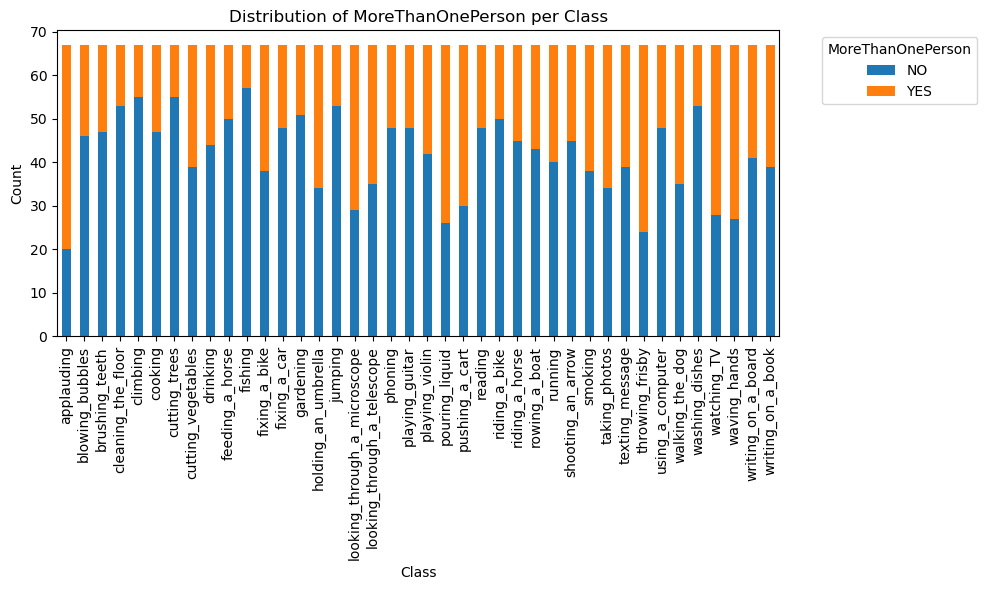

In [5]:
class_counts = data_resampled.groupby(['Class', 'MoreThanOnePerson']).size().unstack(fill_value=0)

class_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of MoreThanOnePerson per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='MoreThanOnePerson', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

There are obviously major imbalances of `MoreThanOnePerson` within the actions classes. This might create alot of bias towards the majorities within each class as the model could generalise that if it is climbing then it will also be `No` for `MoreThanOnePerson`.

## TODO ##

In [6]:
# This will plot the performance of the model after training

def plot_training_history(history):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 5))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['base_model_1_accuracy'])
    plt.plot(history.history['base_model_1_1_accuracy'])
    plt.plot(history.history['val_base_model_1_accuracy'])
    plt.plot(history.history['val_base_model_1_1_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train Output1', 'Train Output2', 'Val Output1', 'Val Output2'], loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['base_model_1_loss'])
    plt.plot(history.history['base_model_1_1_loss'])
    plt.plot(history.history['val_base_model_1_loss'])
    plt.plot(history.history['val_base_model_1_1_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Output1', 'Train Output2', 'Val Output1', 'Val Output2'], loc='upper right')
    
    plt.tight_layout()
    plt.show()


## Base Model Development ##
I will be basing my model off of Kaushal Shah's multi output CNN for detecting written letters. [https://kaushal28.github.io/Building-Multi-Output-CNN-with-Keras/]

His model had to make 3 classifications for a total of 186: 168 grapheme root, 11 vowel diacritics and 7 consonant diacritics. Since this model will only need to make 2 classifications to a total of 42: 40 actions and a boolean for if there are multiple people, I will use a slightly less complex version of his network.

The convolutional portion of my base model will have 3 sets of a convultion, batch normalisation and max pooling applied before going to an MLP with 2 hidden layers.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from tensorflow import keras
from tensorflow.keras import Model

class BaseModel(Model):
    def __init__(self):
        super(BaseModel, self).__init__()
        # Convultional segment 1
        self.conv0 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.conv1 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.bn1 = BatchNormalization(momentum=0.15)
        self.pool1 = MaxPooling2D((2, 2))
        self.conv2 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.drop1 = Dropout(0.3)
        
        # Convultional segment 2
        self.conv3 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.bn2 = BatchNormalization(momentum=0.15)
        self.pool2 = MaxPooling2D((2, 2))
        self.conv4 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.bn3 = BatchNormalization(momentum=0.15)
        self.drop2 = Dropout(0.3)
        
        # MLP segment
        self.flatten = Flatten()
        self.dense1 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.drop3 = Dropout(0.3)
        self.dense2 = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        
        self.d2_output1 = Dense(40, activation='softmax', name='output1')
        self.d2_output2 = Dense(2, activation='softmax', name='output2')

    def call(self, inputs):
        x = self.conv0(inputs)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.drop1(x)
        
        x = self.conv3(x)
        x = self.bn2(x)
        x = self.pool2(x)
        x = self.conv4(x)
        x = self.bn3(x)
        x = self.drop2(x)
        
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.drop3(x)
        x = self.dense2(x)
        
        output1 = self.d2_output1(x)
        output2 = self.d2_output2(x)
        return [output1, output2]

# Create the model with a specified input shape
input_shape = (128, 128, 3)  # Adjust this based on your image size and channels
inputs = Input(shape=input_shape)
model = BaseModel()
outputs = model(inputs)
model = Model(inputs=inputs, outputs=outputs)

In [10]:
optimizer = tf.keras.optimizers.legacy.Adam()

model.compile(
    optimizer=optimizer, 
    loss=['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy'],
    loss_weights=[1.0, 1.0],
    metrics=['accuracy']
)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 base_model_2 (BaseModel)    [(None, 40),              411870058 
                              (None, 2)]                         
                                                                 
Total params: 411,870,058
Trainable params: 411,868,970
Non-trainable params: 1,088
_________________________________________________________________


We now need to create the data set. `FileName`, `Class`, `MoreThanOnePerson`

In [113]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

def create_dataset(dataframe, target_size=(224, 224)):
    images = []
    labels1 = []
    labels2 = []
    
    for _, row in dataframe.iterrows():
        img_path = './A1_2024_data/Images/' + row['FileName']
        label1 = row['Class']
        label2 = row['MoreThanOnePerson']
        
        img = load_and_preprocess_image(img_path, target_size=target_size)
        images.append(img)
        labels1.append(label1)
        labels2.append(label2)
    
    return np.array(images), np.array(labels1), np.array(labels2)

X, y1, y2 = create_dataset(data_resampled)

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

y1_encoded = le1.fit_transform(y1)
y2_encoded = le2.fit_transform(y2)

X_train, X_val, y1_train, y1_val, y2_train, y2_val = train_test_split(
    X, y1_encoded, y2_encoded, test_size=0.2, random_state=42
)

In [115]:
def create_data_gen(X, y1, y2, batch_size=32, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((X, (y1, y2)))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X))
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_data_gen(X_train, y1_train, y2_train)
val_dataset = create_data_gen(X_val, y1_val, y2_val, shuffle=False)

## Loading tensor board ##

In [104]:
import os
import datetime

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1675), started 0:04:29 ago. (Use '!kill 1675' to kill it.)

In [116]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[early_stopping, tensorboard_callback]
)

Epoch 1/50


2024-08-16 12:51:45.333887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [2144]
	 [[{{node Placeholder/_2}}]]
2024-08-16 12:51:45.335799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [2144]
	 [[{{node Placeholder/_2}}]]


67/67 [==============================] - ETA: 0s - loss: 26.2021 - base_model_11_loss: 18.7918 - base_model_11_1_loss: 4.9976 - base_model_11_accuracy: 0.0289 - base_model_11_1_accuracy: 0.5336

2024-08-16 12:53:33.800521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [536]
	 [[{{node Placeholder/_2}}]]


67/67 [==============================] - 132s 2s/step - loss: 26.2021 - base_model_11_loss: 18.7918 - base_model_11_1_loss: 4.9976 - base_model_11_accuracy: 0.0289 - base_model_11_1_accuracy: 0.5336 - val_loss: 21.0775 - val_base_model_11_loss: 12.1259 - val_base_model_11_1_loss: 5.9414 - val_base_model_11_accuracy: 0.0243 - val_base_model_11_1_accuracy: 0.6119
Epoch 2/50
67/67 [==============================] - 130s 2s/step - loss: 7.6009 - base_model_11_loss: 3.8646 - base_model_11_1_loss: 0.7462 - base_model_11_accuracy: 0.0247 - base_model_11_1_accuracy: 0.6143 - val_loss: 64.5939 - val_base_model_11_loss: 42.9998 - val_base_model_11_1_loss: 18.6720 - val_base_model_11_accuracy: 0.0187 - val_base_model_11_1_accuracy: 0.6119
Epoch 3/50
67/67 [==============================] - 138s 2s/step - loss: 7.2129 - base_model_11_loss: 3.7053 - base_model_11_1_loss: 0.6762 - base_model_11_accuracy: 0.0187 - base_model_11_1_accuracy: 0.6259 - val_loss: 75.1730 - val_base_model_11_loss: 49.2681 

KeyboardInterrupt: 

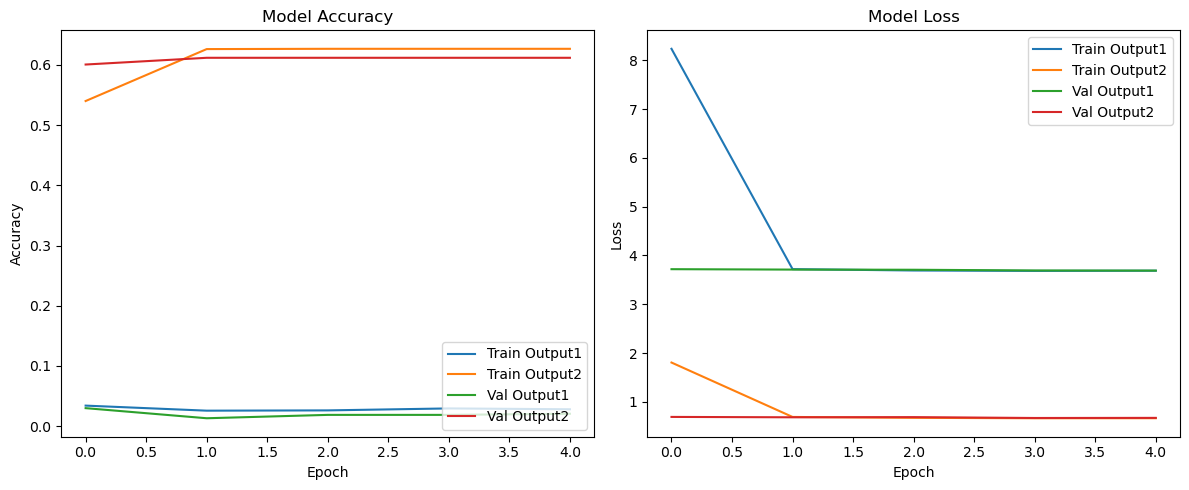

In [40]:
plot_training_history(history)